In [134]:
import gc
import os
import logging
import datetime
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import lightgbm as lgb
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search

#Import libraries:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search

from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split


import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4
import matplotlib
import matplotlib.pyplot as pyplot # for plotting

import gc
import os
import logging
import datetime
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import lightgbm as lgb
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier,Pool
from IPython.display import display
import matplotlib.patches as patch
import matplotlib.pyplot as plt
from sklearn.svm import NuSVR
from scipy.stats import norm
from sklearn import svm
import lightgbm as lgb
import xgboost as xgb
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import time
import glob
import sys
import os
import gc
from collections import Counter

from sklearn.preprocessing import Imputer
from scipy.stats import chi2_contingency

# libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd

In [156]:
#Functions 

#Missing data 
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    #return(np.transpose(tt))
    tt=tt.sort_values('Percent',ascending=False)
    return tt


def plot_feature_distribution_num(df1, df2, label1, label2, features,x,y):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(x,y,figsize=(18,22))

    for feature in features:
        i += 1
        plt.subplot(x,y,i)
        sns.distplot(df1[feature], hist=False,label=label1)
        sns.distplot(df2[feature], hist=False,label=label2)
        plt.xlabel(feature, fontsize=9)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=6, pad=-6)
        plt.tick_params(axis='y', which='major', labelsize=6)
    plt.show();
    
def plot_feature_distribution_cat(df,features,x,y):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(x,y,figsize=(18,22))

    for feature in features:
        i += 1
        plt.subplot(x,y,i)
        stackPercBar(df,feature)
        plt.xlabel(feature, fontsize=9)
        #locs, labels = plt.xticks()
        #plt.tick_params(axis='x', which='major', labelsize=6, pad=-6)
        #plt.tick_params(axis='y', which='major', labelsize=6)
    plt.show();
    
def heatMap(df,dropCols):
    cols_to_fit = [col for col in train.columns if col not in cols_to_drop]
    corr = train[cols_to_fit].corr()
    plt.figure(figsize=(20,20))
    sns.heatmap(
        corr,
        xticklabels=corr.columns.values,
        yticklabels=corr.columns.values,
        linecolor='white',
        linewidths=0.1,
        cmap="RdBu"
    )
    plt.show()
    #print(corr)
    
#Feature engineering 
def newFeatures(df):
    idx = features = df.columns.values[2:59]
    for df in [test_df, train_df]:
        df['sum'] = df[idx].sum(axis=1)  
        df['min'] = df[idx].min(axis=1)
        df['max'] = df[idx].max(axis=1)
        df['mean'] = df[idx].mean(axis=1)
        df['std'] = df[idx].std(axis=1)
        df['skew'] = df[idx].skew(axis=1)
        df['kurt'] = df[idx].kurtosis(axis=1)
        df['med'] = df[idx].median(axis=1)
    return df 

def binFeat(df):
    bf = [x for x in train.columns if 'bin' in x.lower()] 
    return bf 

def catFeat(df):
    cf = [x for x in train.columns if 'cat' in x.lower()] 
    return cf

def missingAnalysis(df,val):
    percV=list()
    for x in df.columns:
        z=df[df[x]==val].shape[0]
        perc=round((z/df.shape[0])*100,2)
        percV.append(perc)
    df = pd.DataFrame({'columns':df.columns,'nItems':percV}).sort_values("nItems",ascending=False)
    return df

def codeMissing(df):
    df=df.replace(-1,np.nan)
    return df 

def impute(df,cat,func):
    
    imputer = Imputer(missing_values = 'NaN', strategy = func, axis = 0)
    imputer = imputer.fit(df[cat])
    data[cat] = imputer.transform(df[cat])
    return data 
#from collections import Counter
#dat = Counter(data['ps_ind_06_bin'])
#a=dat.most_common(1)  # Returns all unique items and their counts
#a[0][0] 


def stackPercBar(df,feat):
    r = [0,1]
    tab = pd.crosstab(index=data["target"], columns=data[feat]).reset_index()
    list(tab.iloc[:,1])
    df = pd.DataFrame({'var_0':list(tab.iloc[:,1]),'var_1':list(tab.iloc[:,2])})

    # From raw value to percentage
    totals = [i+j for i,j in zip(df['var_0'], df['var_1'])]
    var_0 = [i / j * 100 for i,j in zip(df['var_0'], totals)]
    var_1 = [i / j * 100 for i,j in zip(df['var_1'], totals)]

    # plot
    barWidth = 0.85
    names = ('target_0','target_1')
    # Create green Bars
    plt.bar(r, var_0, color='blue', edgecolor='white', width=barWidth)
    # Create orange Bars
    plt.bar(r, var_1, bottom=var_0, color='yellow', edgecolor='white', width=barWidth)
    # Create blue Bars
    #plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='white', width=barWidth)
 
    # Custom x axis
    plt.xticks(r, names)
    #plt.xlabel("group")
 
    # Show graphic
    #plt.show()
 

In [42]:
#Read train 
train=pd.read_csv("train.csv")
train=train.rename({'target':'Target'},axis=1)
train['target']=train['Target']
train=train.drop('Target',axis=1)

#Read test 
test=pd.read_csv("test.csv")

#Append train and test 
data=train.append(test)

In [43]:
print("train shape: ", train.shape)
print("test shape: ", test.shape)
print("Data shape: ",data.shape)

train shape:  (595212, 59)
test shape:  (892816, 58)
Data shape:  (1488028, 59)


In [44]:
#Features according to the data types 

bf=binFeat(train)
cf=catFeat(train)
bincatFeat=bf+cf
remFeat=['id','target']
nf=[item for item in train.columns if item not in bincatFeat+remFeat]

In [45]:
missingAnalysis(data,-1).head(10)

,columns,nItems
23,ps_car_03_cat,69.09
25,ps_car_05_cat,44.82
57,ps_reg_03,18.11
35,ps_car_14,7.15
27,ps_car_07_cat,1.94
41,ps_ind_05_cat,0.98
29,ps_car_09_cat,0.10
38,ps_ind_02_cat,0.04
21,ps_car_01_cat,0.02
40,ps_ind_04_cat,0.02


In [46]:
data=codeMissing(data)

In [47]:
missing_data(data).head(10)
#remFeatures=['ps_car_03_cat','ps_car_05,cat']

,Total,Percent,Types
ps_car_03_cat,1028142,69.094264,float64
target,892816,59.999946,float64
ps_car_05_cat,666910,44.818377,float64
ps_reg_03,269456,18.108261,float64
ps_car_14,106425,7.152083,float64
ps_car_07_cat,28820,1.936792,float64
ps_ind_05_cat,14519,0.975721,float64
ps_car_09_cat,1446,0.097176,float64
ps_ind_02_cat,523,0.035147,float64
ps_car_01_cat,267,0.017943,float64


In [48]:
data=impute(data,bincatFeat,'most_frequent')
data=impute(data,nf,'median')

In [49]:
missing_data(data).head(10)

,Total,Percent,Types
target,892816,59.999946,float64
ps_ind_08_bin,0,0.000000,float64
ps_car_11_cat,0,0.000000,float64
ps_car_12,0,0.000000,float64
ps_car_13,0,0.000000,float64
ps_car_14,0,0.000000,float64
ps_car_15,0,0.000000,float64
ps_ind_01,0,0.000000,float64
ps_ind_02_cat,0,0.000000,float64
ps_ind_03,0,0.000000,float64


In [53]:
train=data[~(data['target'].isna())]
test=data[(data['target'].isna())]
print("Train shape: " ,train.shape, "Test shape: ",test.shape)

Train shape:  (595212, 59) Test shape:  (892816, 59)


0.0    573518
1.0     21694
Name: target, dtype: int64


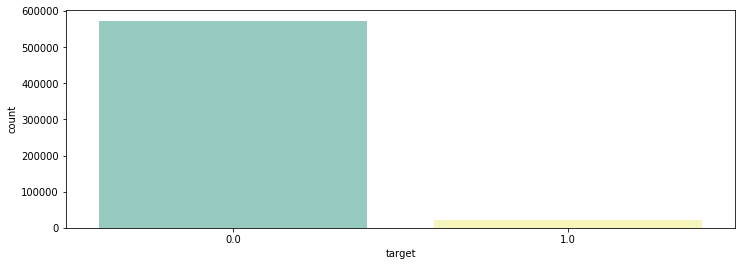

In [54]:
sns.countplot(train['target'],palette='Set3')
print(train['target'].value_counts())

In [56]:
train[nf].head(2)

,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_11,ps_car_12,ps_car_13,...,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
0,2.0,5.0,0.0,11.0,0.7,0.2,0.718070,2.0,0.400000,0.883679,...,1.0,10.0,1.0,10.0,1.0,5.0,9.0,1.0,5.0,8.0
1,1.0,7.0,0.0,3.0,0.8,0.4,0.766078,3.0,0.316228,0.618817,...,1.0,9.0,5.0,8.0,1.0,7.0,3.0,1.0,1.0,9.0


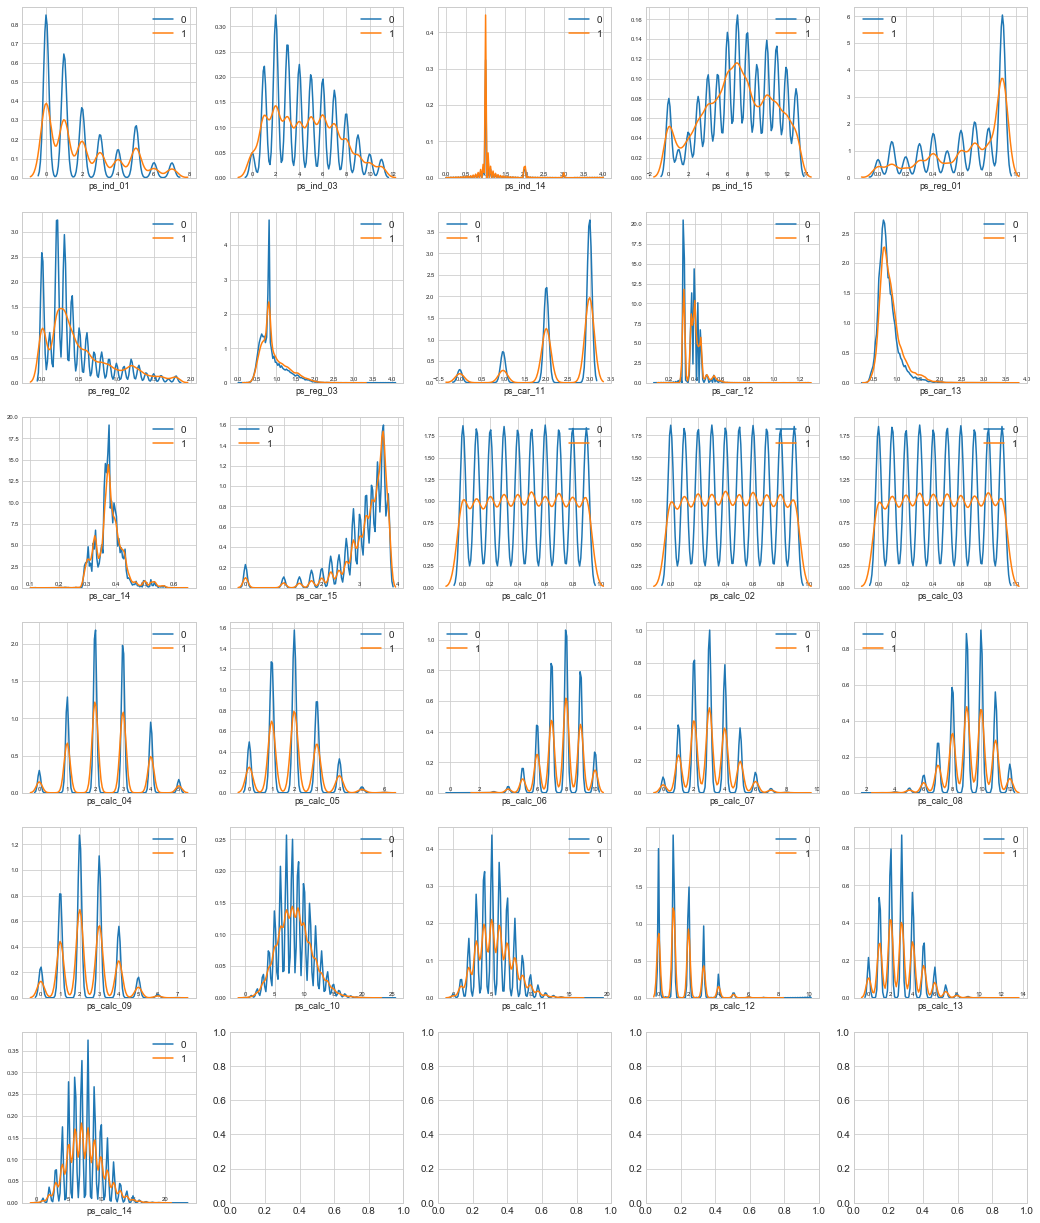

In [57]:
#Plottingnumerical features.
t0 = train[nf].loc[train['target'] == 0]
t1 = train[nf].loc[train['target'] == 1]
features = train[nf].columns.values
plot_feature_distribution_num(t0, t1, '0', '1', features,6,5)

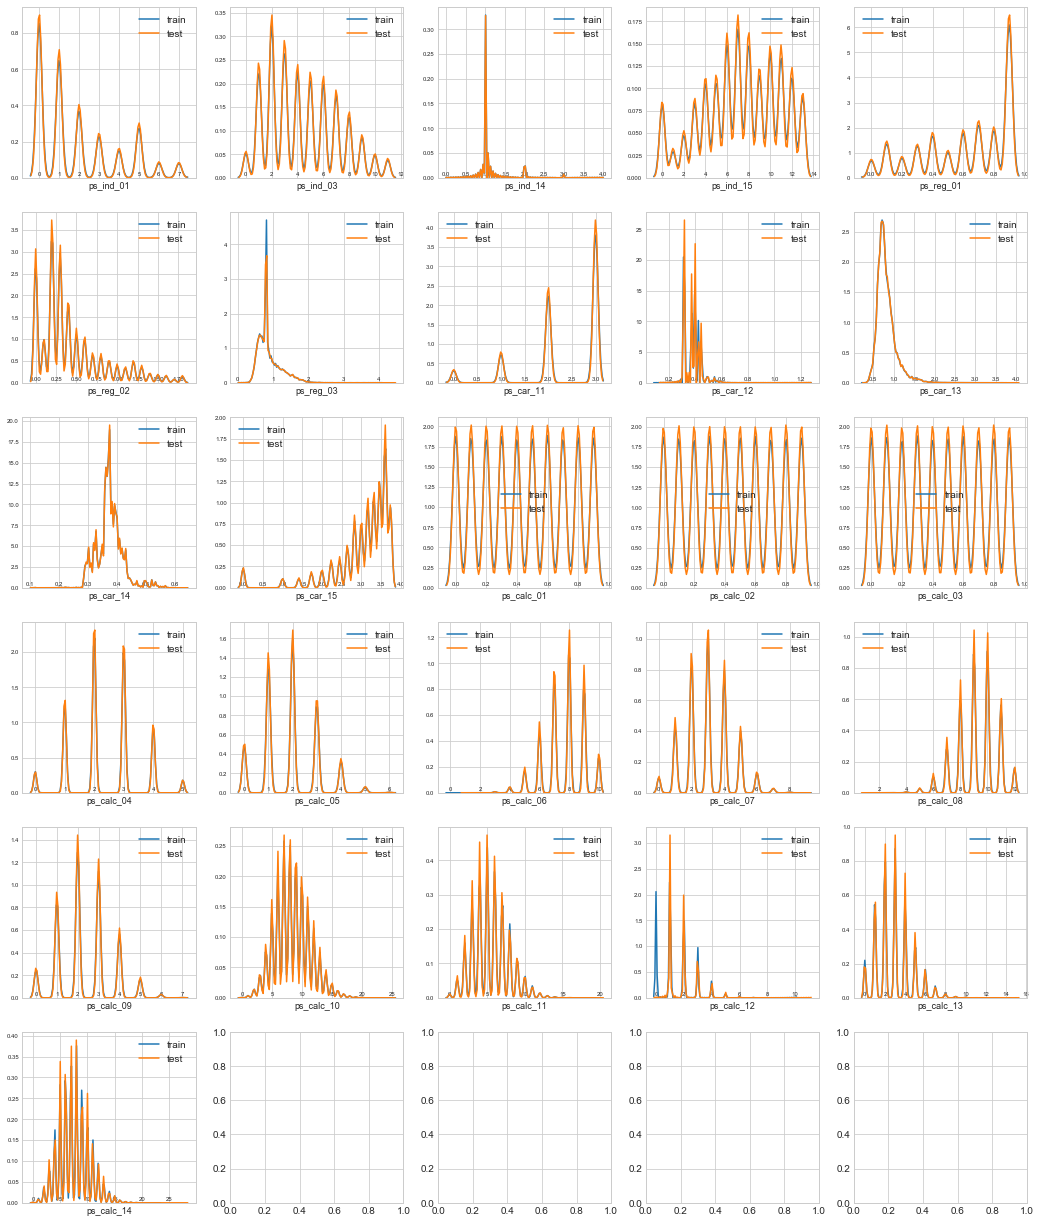

In [59]:
#features for train and test 
features = train[nf].columns.values
plot_feature_distribution_num(train, test, 'train', 'test', features,6,5)

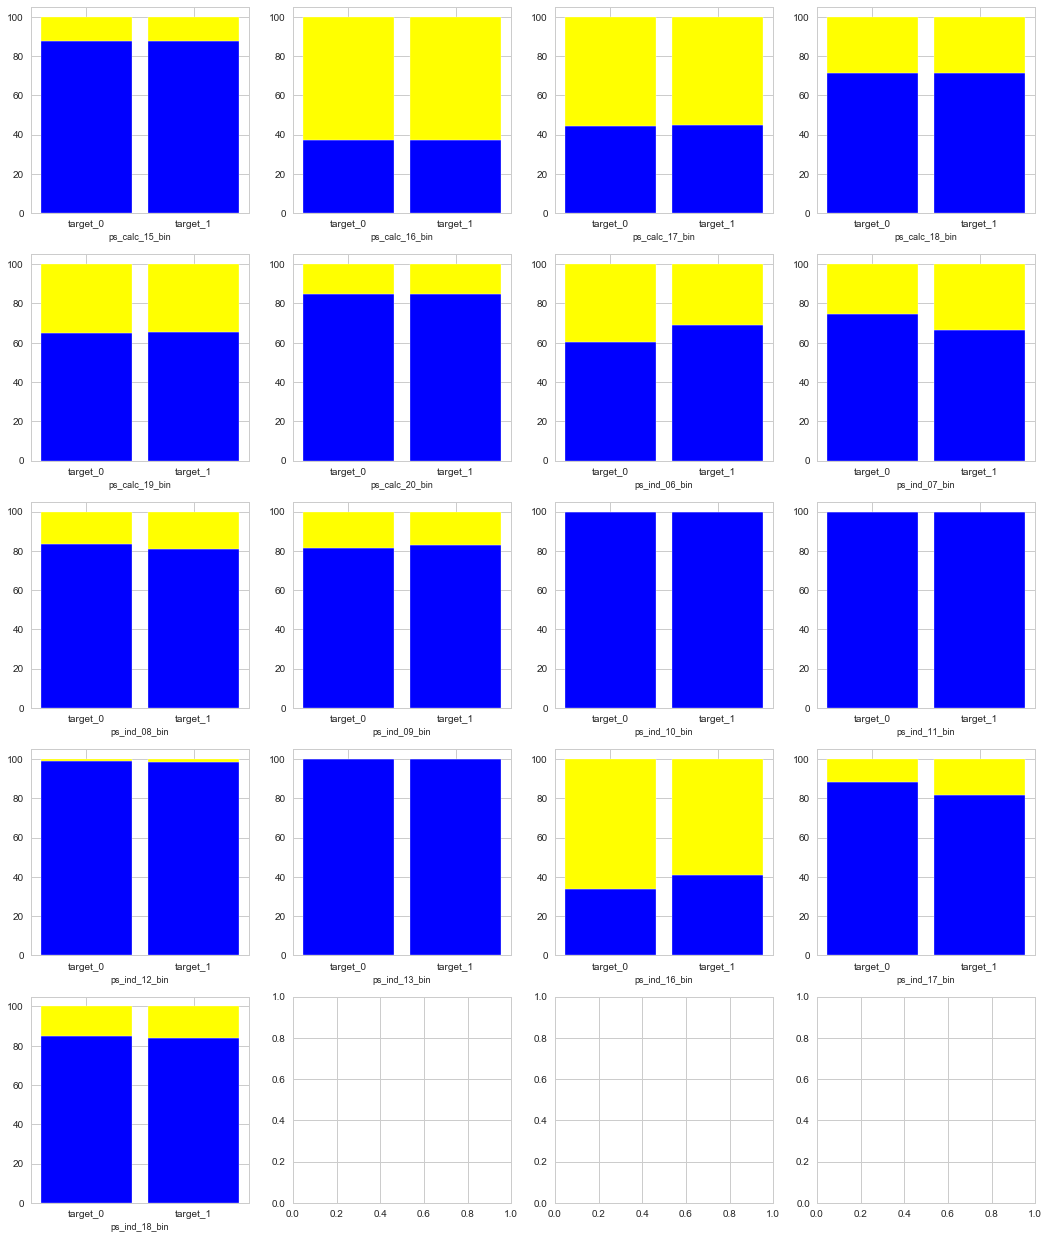

In [159]:
featu=binFeat(train)
plot_feature_distribution_cat(train,featu,5,4)

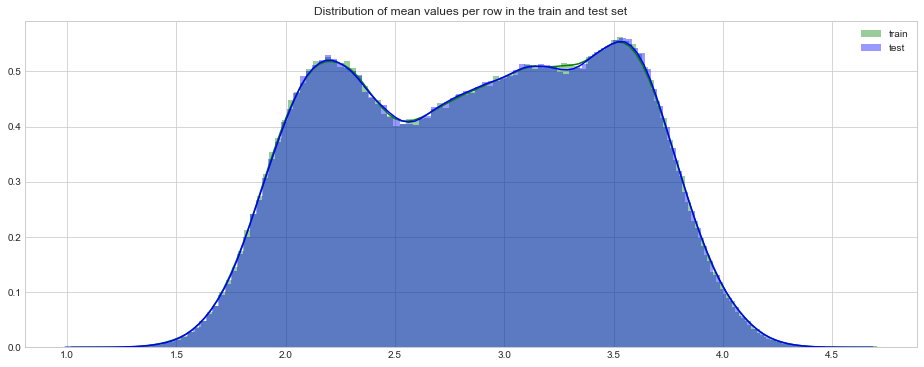

In [30]:
#distribution of the mean values per row in the train and test set.
def summaryStatPlot(df1,df2,features,title):
    plt.figure(figsize=(16,6))
    plt.title(title)
    sns.distplot(df1[features].mean(axis=1),color='green',kde=True,bins=120,label='train')
    sns.distplot(df2[features].mean(axis=1),color='blue',kde=True,bins=120,label='test')
    plt.legend()
    plt.show()

features = train.columns.values[2:59]
summaryStatPlot(train,test,features,("Distribution of mean values per row in the train and test set"))

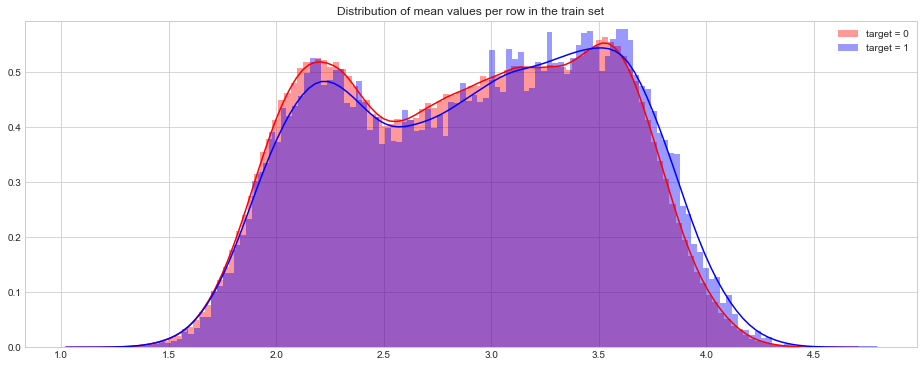

In [32]:
#distribution of the mean value per row in the train dataset, grouped by value of target.
t0 = train.loc[train['target'] == 0]
t1 = train.loc[train['target'] == 1]
plt.figure(figsize=(16,6))
plt.title("Distribution of mean values per row in the train set")
sns.distplot(t0[features].mean(axis=1),color="red", kde=True,bins=120, label='target = 0')
sns.distplot(t1[features].mean(axis=1),color="blue", kde=True,bins=120, label='target = 1')
plt.legend(); plt.show()

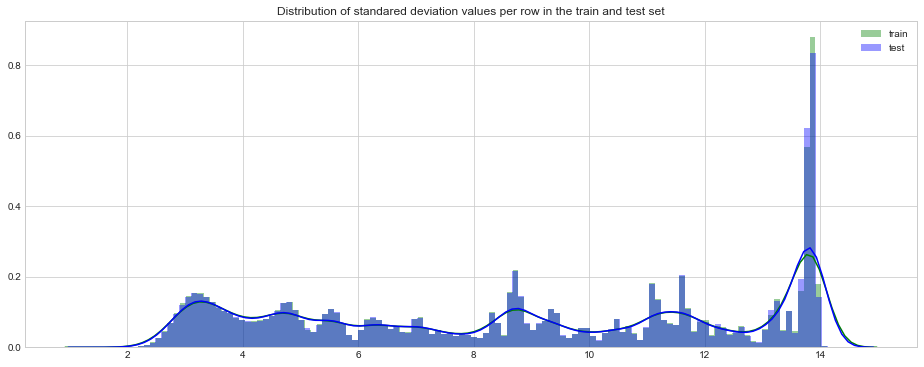

In [31]:
#distribution of the mean values per row in the train and test set.
def summaryStatPlot(df1,df2,features,title):
    plt.figure(figsize=(16,6))
    plt.title(title)
    sns.distplot(df1[features].std(axis=1),color='green',kde=True,bins=120,label='train')
    sns.distplot(df2[features].std(axis=1),color='blue',kde=True,bins=120,label='test')
    plt.legend()
    plt.show()

features = train.columns.values[2:59]
summaryStatPlot(train,test,features,("Distribution of standared deviation values per row in the train and test set"))

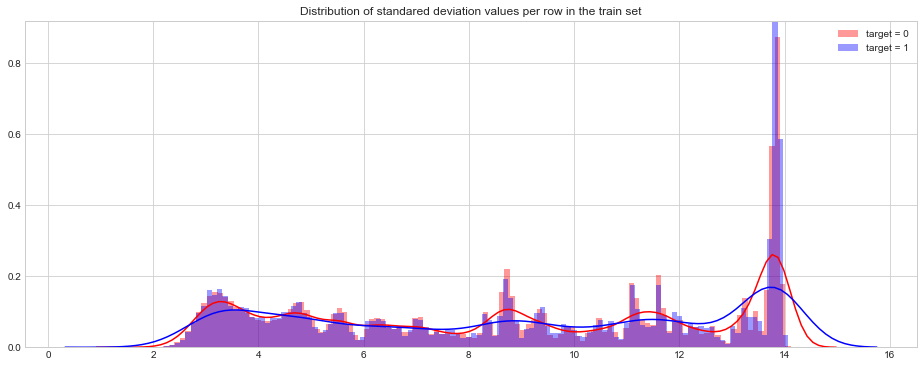

In [33]:
#distribution of the mean value per row in the train dataset, grouped by value of target.
t0 = train.loc[train['target'] == 0]
t1 = train.loc[train['target'] == 1]
plt.figure(figsize=(16,6))
plt.title("Distribution of standared deviation values per row in the train set")
sns.distplot(t0[features].std(axis=1),color="red", kde=True,bins=120, label='target = 0')
sns.distplot(t1[features].std(axis=1),color="blue", kde=True,bins=120, label='target = 1')
plt.legend(); plt.show()

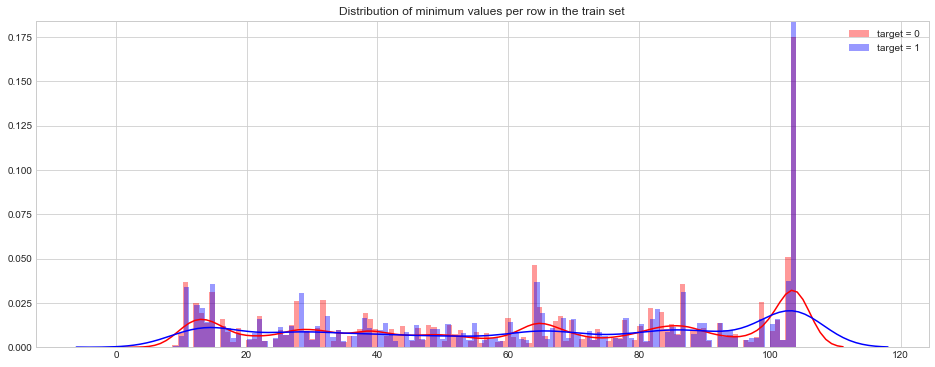

In [36]:
#distribution of the mean value per row in the train dataset, grouped by value of target.
t0 = train.loc[train['target'] == 0]
t1 = train.loc[train['target'] == 1]
plt.figure(figsize=(16,6))
plt.title("Distribution of minimum values per row in the train set")
sns.distplot(t0[features].max(axis=1),color="red", kde=True,bins=120, label='target = 0')
sns.distplot(t1[features].max(axis=1),color="blue", kde=True,bins=120, label='target = 1')
plt.legend(); plt.show()

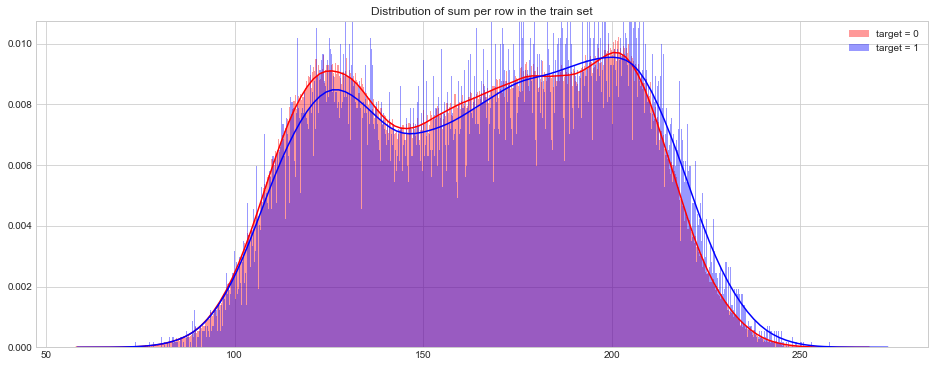

In [51]:
#distribution of the sum per row in the train dataset, grouped by value of target.
t0 = train.loc[train['target'] == 0]
t1 = train.loc[train['target'] == 1]
plt.figure(figsize=(16,6))
plt.title("Distribution of sum per row in the train set")
sns.distplot(t0[features].sum(axis=1),color="red", kde=True,bins=700, label='target = 0')
sns.distplot(t1[features].sum(axis=1),color="blue", kde=True,bins=700, label='target = 1')
plt.legend(); plt.show()

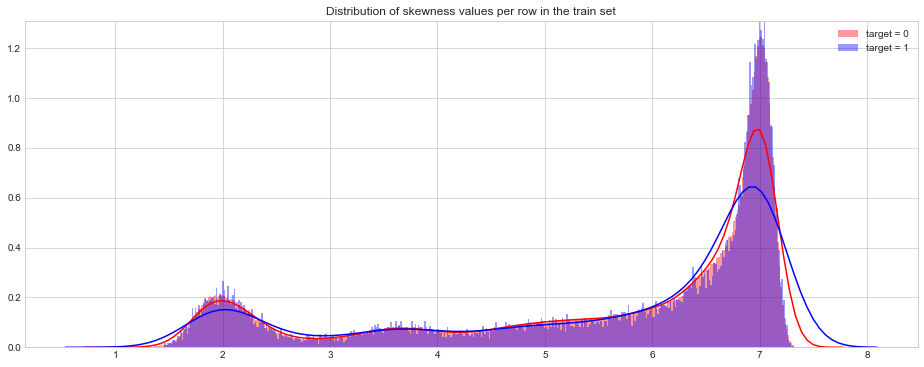

In [49]:
#distribution of the sskewness per row in the train dataset, grouped by value of target.
t0 = train.loc[train['target'] == 0]
t1 = train.loc[train['target'] == 1]
plt.figure(figsize=(16,6))
plt.title("Distribution of skewness values per row in the train set")
sns.distplot(t0[features].skew(axis=1),color="red", kde=True,bins=400, label='target = 0')
sns.distplot(t1[features].skew(axis=1),color="blue", kde=True,bins=400, label='target = 1')
plt.legend(); plt.show()

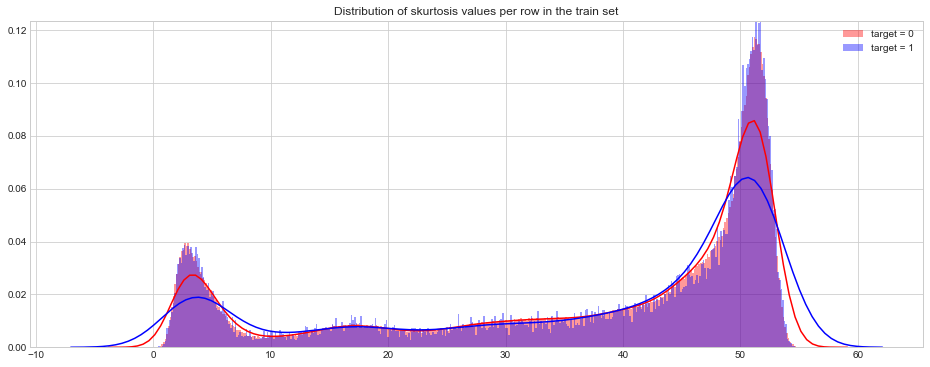

In [48]:
#distribution of the sum per row in the train dataset, grouped by value of target.
t0 = train.loc[train['target'] == 0]
t1 = train.loc[train['target'] == 1]
plt.figure(figsize=(16,6))
plt.title("Distribution of skurtosis values per row in the train set")
sns.distplot(t0[features].kurtosis(axis=1),color="red", kde=True,bins=400,label='target = 0')
sns.distplot(t1[features].kurtosis(axis=1),color="blue", kde=True,bins=400,label='target = 1')
plt.legend(); plt.show()

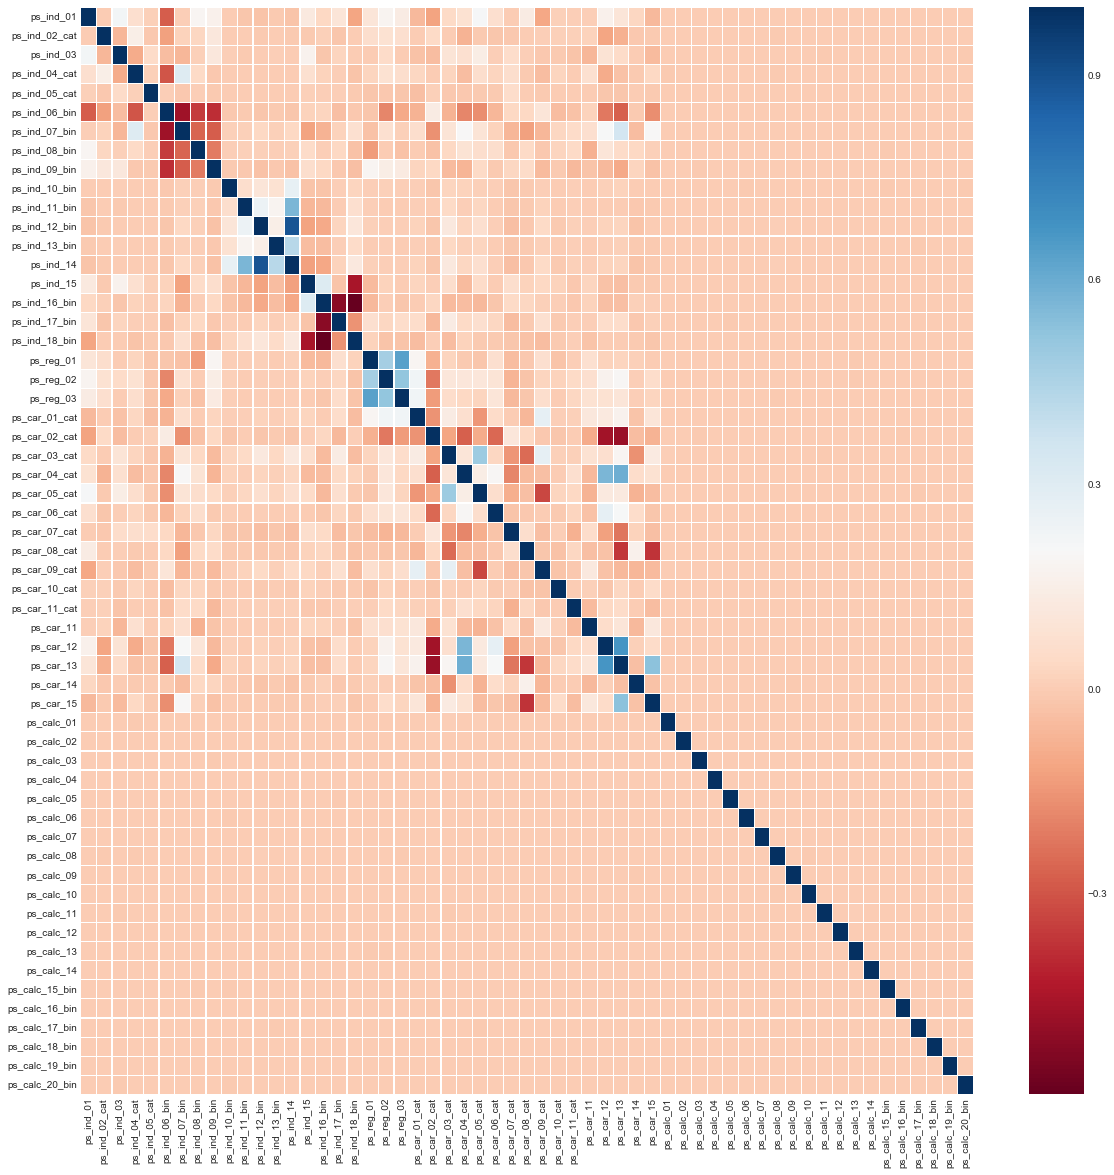

In [58]:
heatMap(train,['id','target'])

In [65]:
features = train.columns.values[2:59]
correlations = train[features].corr().abs().unstack().sort_values(kind="quicksort",ascending=False).reset_index()
correlations = correlations[correlations['level_0'] != correlations['level_1']]
correlations.head(20)

(3192, 3)

id                  int64
ps_ind_01           int64
ps_ind_02_cat       int64
ps_ind_03           int64
ps_ind_04_cat       int64
ps_ind_05_cat       int64
ps_ind_06_bin       int64
ps_ind_07_bin       int64
ps_ind_08_bin       int64
ps_ind_09_bin       int64
ps_ind_10_bin       int64
ps_ind_11_bin       int64
ps_ind_12_bin       int64
ps_ind_13_bin       int64
ps_ind_14           int64
ps_ind_15           int64
ps_ind_16_bin       int64
ps_ind_17_bin       int64
ps_ind_18_bin       int64
ps_reg_01         float64
ps_reg_02         float64
ps_reg_03         float64
ps_car_01_cat       int64
ps_car_02_cat       int64
ps_car_03_cat       int64
ps_car_04_cat       int64
ps_car_05_cat       int64
ps_car_06_cat       int64
ps_car_07_cat       int64
ps_car_08_cat       int64
ps_car_09_cat       int64
ps_car_10_cat       int64
ps_car_11_cat       int64
ps_car_11           int64
ps_car_12         float64
ps_car_13         float64
ps_car_14         float64
ps_car_15         float64
ps_calc_01  